# Time Series Prediction of confirmed cases with Decision Tree's using scikit-learn

*** V1.0 ***
main version

last changes: 30.06.2020

TODO:
- Update dataset ?
- Train model on data for several countries (US, Germany, South Korea, Russia, Australia)
- cross validation

- feature engineering (what features have the biggest impact)
- tensorboard 

DONE:
- scaling (min_max_scaler)

In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [2]:
# import standard libaries 
import pandas as pd
import numpy as np
import datetime

# import machine learning libaries

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Import standardized dataset
source_folder = "../../standardized_datasets/"
filename = "2020-05-27_filtered_countries_julius_complete.csv"

# filename = str(datetime.date.today())+'_filtered_countries_julius_complete.csv'

df = pd.read_csv(source_folder+filename, index_col=['country', 'date'])
df.drop(columns='cumulative_daily_change_total', inplace=True)

df

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0     0.920   
        2020-01-23        1.0     0.0        0.0     0.920   
        2020-01-24        2.0     0.0        0.0     0.920   
        2020-01-25        2.0     0.0        0.0     0.920   
        2020-01-26        5.0     0.0        0.0     0.920   
...                       ...     ...        ...       ...   
Kenya   2020-05-22     1161.0    50.0      380.0     0.579   
        2020-05-23     1192.0    50.0      380.0     0.579   
        2020-05-24     1214.0    51.0      383.0     0.579   
        2020-05-25     1286.0    52.0      402.0     0.579   
        2020-05-26     1348.0    52.0      405.0     0.579   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   
...                                   ...                      ...   
Kenya   2020-05-22              53771.300                   94.478   
        2020-05-23              53771.300                   94.478   
        2020-05-24              53771.300                   94.478   
        2020-05-25              53771.300                   94.478   
        2020-05-26              53771.300                   94.478   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   
...                              ...                            ...     ...   
Kenya   2020-05-22               NaN                            NaN     NaN   
        2020-05-23               NaN                            NaN     NaN   
        2020-05-24               NaN                            NaN     NaN   
        2020-05-25               NaN                            NaN     NaN   
        2020-05-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   
...                                  ...    ...               ...         ...   
Kenya   2020-05-22                   NaN    NaN               NaN         NaN   
        2020-05-23                   NaN    NaN               NaN         NaN   
        2020-05-24                   NaN    NaN               NaN         NaN   
        2020-05-25                   NaN    NaN               NaN         NaN   
        2020-05-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN 

In [3]:
# Limit df to a country of interest for now

country_of_interest = 'Germany'

df_country_of_interest = df.loc[country_of_interest].sort_values(by='date')
pd.set_option('display.max_rows', 200)

# Converts index to datetime (not necessarily needed in this case)
#df_country_of_interest.index = pd.to_datetime(df_country_of_interest.index)

# Important note: the dates here are only reasonable for coi == 'Germany' !!!
df_country_of_interest = df_country_of_interest.loc['2020-02-15':'2020-05-02']

df_country_of_interest.interpolate(inplace=True, limit_area=None)

df_country_of_interest

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [4]:
df_country_of_interest.index

Index(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
       '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',

In [5]:
# Extrapolation function to extrapolate the cumulative_total

def extrapolate(series):
    first_valid_entries = [0,0]
    i = 0
    for entry in series:
        if i == 2:
            break
        if np.isnan(entry) == False:
            first_valid_entries[i] = entry
            i = i + 1

    gradient = first_valid_entries[1] - first_valid_entries[0]
    index = int(np.flatnonzero(series == first_valid_entries[0]))
    while index > 0:
        series.iloc[index-1] = series.iloc[index] - gradient
        index = index - 1

    series[series < 0] = 0


extrapolate(df_country_of_interest.cumulative_total)
extrapolate(df_country_of_interest.cumulative_total_per_thousand)
df_country_of_interest

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [6]:
#df_country_of_interest["confirmed"].plot()

Text(0.5, 1.0, 'Germany')

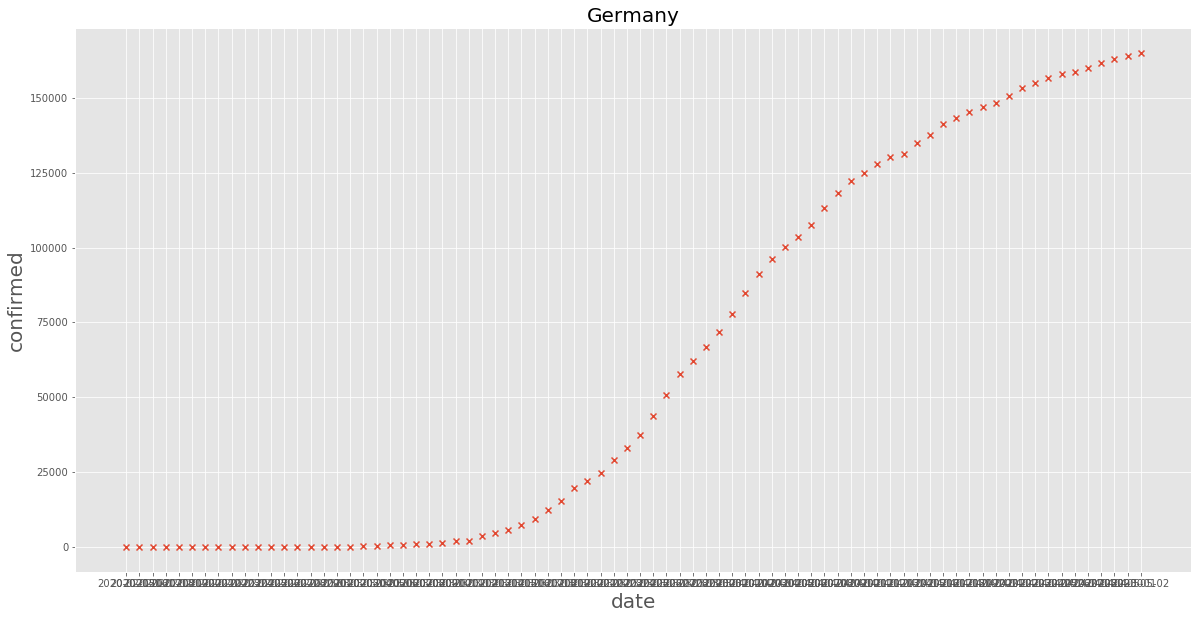

In [7]:
"""Plot time series"""
#df_single_country.plot.scatter(x='date', y='confirmed')
#ax = df_single_country.plot(x='confirmed')
plt.scatter(df_country_of_interest.index, df_country_of_interest['confirmed'], marker='x')
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest, fontsize=20)

#plt.savefig(country_of_interest+'before_svm'+'approx.png')

# Data Preparation for Decision Tree (SINGLE COUNTRY)

In [8]:
df = df_country_of_interest
df.reset_index(inplace=True)
df.head()

date  confirmed  deaths  recovered  hdi_2018  population_total_2020  \
0  2020-02-15       16.0     0.0        1.0     0.939              83783.945   
1  2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2  2020-02-17       16.0     0.0        1.0     0.939              83783.945   
3  2020-02-18       16.0     0.0       12.0     0.939              83783.945   
4  2020-02-19       16.0     0.0       12.0     0.939              83783.945   

   population_density_2020  cumulative_total  cumulative_total_per_thousand  \
0                  240.372               0.0                            0.0   
1                  240.372               0.0                            0.0   
2                  240.372               0.0                            0.0   
3                  240.372               0.0                            0.0   
4                  240.372               0.0                            0.0   

   retail  grocery and pharmacy  parks  transit stations  workplaces  \
0     6.0                   1.0   45.0              10.0         0.0   
1     7.0                  10.0    9.0               6.0        -1.0   
2     2.0                   2.0    7.0               1.0        -2.0   
3     2.0                   2.0   10.0               1.0        -1.0   
4     3.0                   0.0    6.0              -1.0        -1.0   

   residential  driving  transit  walking  pm2.5 value  
0         -1.0    28.00    25.20    61.49         11.0  
1          0.0     9.63    14.91    -1.32         11.0  
2          0.0     8.00    57.64    11.55         11.0  
3          1.0     9.42    40.18    15.71         11.0  
4          1.0    10.81    32.15     9.61         11.0

In [9]:
# drop all features that are fixed for one country and keep 'confirmed' for comparison/evaluation with model results
X_eval = df.drop(['deaths', 'recovered', 'hdi_2018', 'population_total_2020', 'population_density_2020', 'pm2.5 value'], axis=1)

# df with all features
X = X_eval.drop(['confirmed'], axis=1)

# df with target values
y = pd.DataFrame(df['confirmed'])

In [10]:
X.head()

date  cumulative_total  cumulative_total_per_thousand  retail  \
0  2020-02-15               0.0                            0.0     6.0   
1  2020-02-16               0.0                            0.0     7.0   
2  2020-02-17               0.0                            0.0     2.0   
3  2020-02-18               0.0                            0.0     2.0   
4  2020-02-19               0.0                            0.0     3.0   

   grocery and pharmacy  parks  transit stations  workplaces  residential  \
0                   1.0   45.0              10.0         0.0         -1.0   
1                  10.0    9.0               6.0        -1.0          0.0   
2                   2.0    7.0               1.0        -2.0          0.0   
3                   2.0   10.0               1.0        -1.0          1.0   
4                   0.0    6.0              -1.0        -1.0          1.0   

   driving  transit  walking  
0    28.00    25.20    61.49  
1     9.63    14.91    -1.32  
2     8.00    57.64    11.55  
3     9.42    40.18    15.71  
4    10.81    32.15     9.61

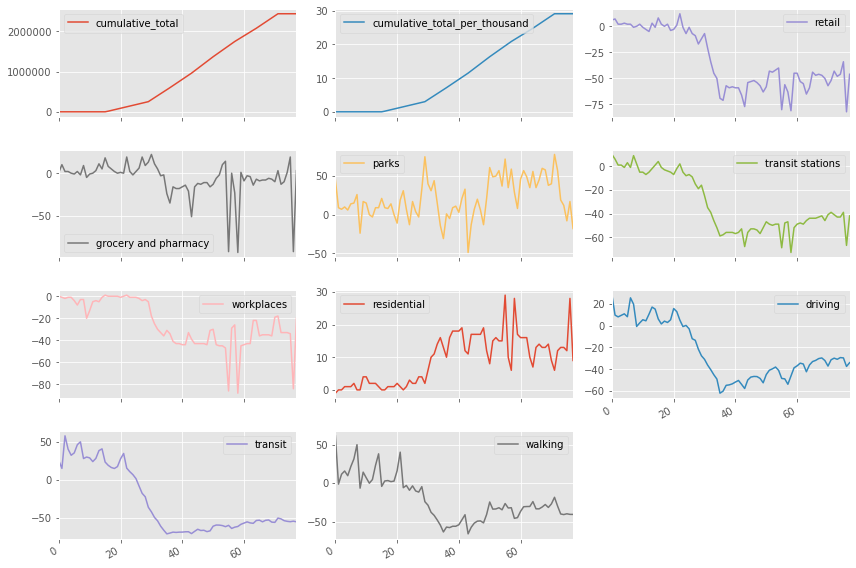

In [11]:
X.plot(subplots=True, layout=(4,3), figsize=(12,8))

plt.tight_layout()
plt.show()

# Apply decision tree

In [12]:
# Create training and test sets manually (because the date indices don't seem to work with train_test_split)
split_val = 50

# training data
X_train = X[X.index < split_val]
y_train = y[y.index < split_val]

# test data
X_test = X[X.index >= split_val]
y_test = y[y.index >= split_val]

# df for comparison of the predicted confirmed and actual confirmed cases
X_test_predict = X_eval[X.index >= split_val]

X.set_index('date', inplace=True)
X_train.set_index('date', inplace=True)
X_test.set_index('date', inplace=True)
X_test_predict.set_index('date', inplace=True)
df.set_index('date', inplace=True)

In [13]:
X_test_predict.head()

confirmed  cumulative_total  cumulative_total_per_thousand  \
date                                                                     
2020-04-05   100123.0      1.370655e+06                      16.359000   
2020-04-06   103374.0      1.424831e+06                      17.005714   
2020-04-07   107663.0      1.479007e+06                      17.652429   
2020-04-08   113296.0      1.533183e+06                      18.299143   
2020-04-09   118181.0      1.587360e+06                      18.945857   

            retail  grocery and pharmacy  parks  transit stations  workplaces  \
date                                                                            
2020-04-05   -58.0                 -13.0   61.0             -47.0       -30.0   
2020-04-06   -43.0                  -6.0   49.0             -49.0       -44.0   
2020-04-07   -44.0                  -2.0   50.0             -50.0       -45.0   
2020-04-08   -42.0                  10.0   57.0             -49.0       -45.0   
2020-04-09   -40.0                  14.0   37.0             -49.0       -47.0   

            residential  driving  transit  walking  
date                                                
2020-04-05          8.0   -44.98   -60.84   -24.58  
2020-04-06         15.0   -41.01   -59.33   -33.87  
2020-04-07         16.0   -39.74   -59.42   -33.63  
2020-04-08         15.0   -38.08   -60.04   -32.06  
2020-04-09         15.0   -41.11   -61.46   -34.74

In [14]:
# FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler

def scaleColumns(df, cols_to_scale):
    min_max_scaler = MinMaxScaler()
    df_scaled = df
    for col in cols_to_scale:
        df_scaled[[col]] = min_max_scaler.fit_transform(df[[col]])
    return df_scaled

# Question:
# Why does the function also modify the values of X_train? SCOPE of variables?

# function call
features_to_scale = list(X_train.columns)

# Note: in case of scaling only certain single features
#features_to_scale = ['retail', 'parks']

#scaleColumns(X_train, features_to_scale)
#scaleColumns(X_test, features_to_scale)

print('')

In [15]:
features_to_scale

['cumulative_total',
 'cumulative_total_per_thousand',
 'retail',
 'grocery and pharmacy',
 'parks',
 'transit stations',
 'workplaces',
 'residential',
 'driving',
 'transit',
 'walking']

# TIME SERIES SPLIT
# (time series cross validation)

from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# CROSS VALIDATION

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model

RF_Model = RandomForestRegressor(n_estimators=100)#, oob_score=True) #,max_features=1)

rgr = RF_Model.fit(X_train, y_train)

confirmed_predicted = rgr.predict(X_test)

X_test_predict.insert(1,'confirmed_predicted', confirmed_predicted)

X_test_predict

confirmed  confirmed_predicted  cumulative_total  \
date                                                           
2020-04-05   100123.0             85920.16      1.370655e+06   
2020-04-06   103374.0             85140.63      1.424831e+06   
2020-04-07   107663.0             85041.97      1.479007e+06   
2020-04-08   113296.0             85140.63      1.533183e+06   
2020-04-09   118181.0             85140.63      1.587360e+06   
2020-04-10   122171.0             83469.51      1.641536e+06   
2020-04-11   124908.0             89088.99      1.695712e+06   
2020-04-12   127854.0             84213.93      1.749888e+06   
2020-04-13   130072.0             81961.38      1.797035e+06   
2020-04-14   131359.0             85002.94      1.844181e+06   
2020-04-15   134753.0             85041.97      1.891328e+06   
2020-04-16   137698.0             85674.16      1.938475e+06   
2020-04-17   141397.0             86196.61      1.985622e+06   
2020-04-18   143342.0             84813.40      2.032768e+06   
2020-04-19   145184.0             87517.49      2.079915e+06   
2020-04-20   147065.0             86184.53      2.131407e+06   
2020-04-21   148291.0             86184.53      2.182899e+06   
2020-04-22   150648.0             86184.53      2.234391e+06   
2020-04-23   153129.0             86184.53      2.285882e+06   
2020-04-24   154999.0             86184.53      2.337374e+06   
2020-04-25   156513.0             87876.57      2.388866e+06   
2020-04-26   157770.0             86517.95      2.440358e+06   
2020-04-27   158758.0             84551.28      2.440358e+06   
2020-04-28   159912.0             85958.57      2.440358e+06   
2020-04-29   161539.0             85724.31      2.440358e+06   
2020-04-30   163009.0             85625.65      2.440358e+06   
2020-05-01   164077.0             82233.11      2.440358e+06   
2020-05-02   164967.0             85978.92      2.440358e+06   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-04-05                      16.359000   -58.0                 -13.0   
2020-04-06                      17.005714   -43.0                  -6.0   
2020-04-07                      17.652429   -44.0                  -2.0   
2020-04-08                      18.299143   -42.0                  10.0   
2020-04-09                      18.945857   -40.0                  14.0   
2020-04-10                      19.592571   -80.0                 -92.0   
2020-04-11                      20.239286   -56.0                   0.0   
2020-04-12                      20.886000   -63.0                 -23.0   
2020-04-13                      21.448714   -81.0                 -93.0   
2020-04-14                      22.011429   -45.0                   1.0   
2020-04-15                      22.574143   -45.0                  -9.0   
2020-04-16                      23.136857   -53.0                  -3.0   
2020-04-17                      23.699571   -55.0                  -4.0   
2020-04-18                      24.262286   -65.0                 -14.0   
2020-04-19                      24.825000   -59.0                  -7.0   
2020-04-20                      25.439571   -44.0                  -9.0   
2020-04-21                      26.054143   -47.0                  -8.0   
2020-04-22                      26.668714   -46.0                  -8.0   
2020-04-23                      27.283286   -47.0                  -6.0   
2020-04-24                      27.897857   -50.0                  -7.0   
2020-04-25                      28.512429   -57.0                 -10.0   
2020-04-26                      29.127000   -52.0                   3.0   
2020-04-27                      29.127000   -43.0                 -13.0   
2020-04-28                      29.127000   -48.0                 -10.0   
2020-04-29                      29.127000   -46.0                   1.0   
2020-04-30                      29.127000   -34.0                 

In [17]:
# Info on the different datasets

X.info()
print('\n')
X_train.info()
print('\n')
X_test.info()
print('\n')
X_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2020-02-15 to 2020-05-02
Data columns (total 11 columns):
cumulative_total                 78 non-null float64
cumulative_total_per_thousand    78 non-null float64
retail                           78 non-null float64
grocery and pharmacy             78 non-null float64
parks                            78 non-null float64
transit stations                 78 non-null float64
workplaces                       78 non-null float64
residential                      78 non-null float64
driving                          78 non-null float64
transit                          78 non-null float64
walking                          78 non-null float64
dtypes: float64(11)
memory usage: 7.3+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 2020-02-15 to 2020-04-04
Data columns (total 11 columns):
cumulative_total                 50 non-null float64
cumulative_total_per_thousand    50 non-null float64
retail                           50 n

X_test_predict[['confirmed', 'confirmed_predicted']].plot(figsize=(15,10))
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest+' (with min_max_scaler), n_estimators = 10', fontsize=20)

plt.savefig(str(datetime.date.today()) + '_RandomForest_' + country_of_interest + '_confirmed_predicted_with_min_max_scaling_estimators10.png')

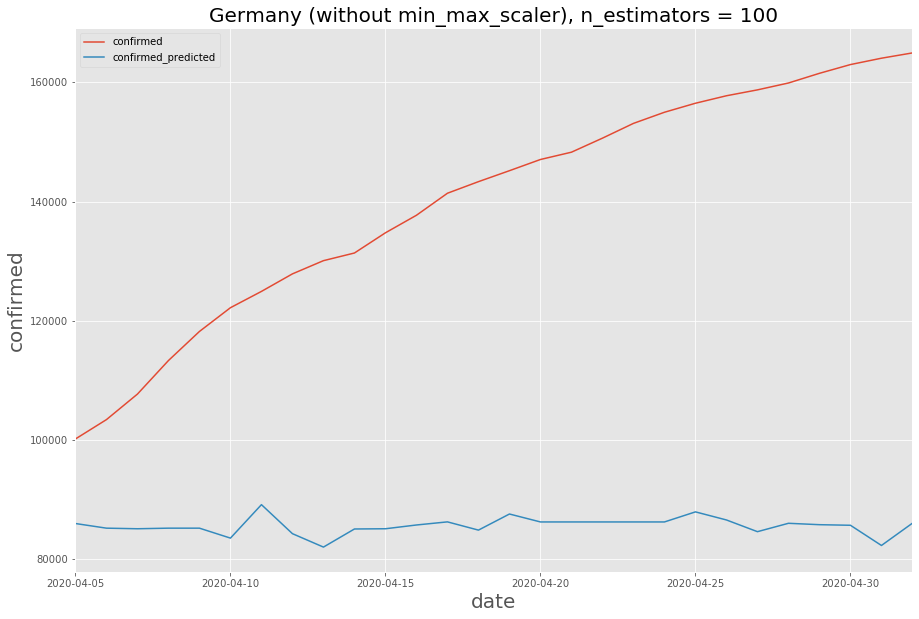

In [18]:
X_test_predict[['confirmed', 'confirmed_predicted']].plot(figsize=(15,10))
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest+' (without min_max_scaler), n_estimators = 100', fontsize=20)

plt.savefig(str(datetime.date.today()) + '_RandomForest_' + country_of_interest + '_confirmed_predicted_without_min_max_scaling_estimators100.png')